# Tutorial Brief

We will be using tweepy library to perform data mine on twitter.

##Twitter API

https://apps.twitter.com/

###Topics:

**Topic 1**: Register You App.

**Topic 2**: Using REST API

**Video Tutorial**:

https://www.youtube.com/user/roshanRush

# Import the library

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

reload(sys)
sys.setdefaultencoding('utf-8')

# Authentication

In [2]:
consumer_key = "GG3j4A0jpSGXBt9D7aM4QzdBV" # Use your own key. To get a key https://apps.twitter.com/
consumer_secret = "SsYRzE2on0xLWwPZ70Mi7YUabcaBaoohUFYlyEVjiw7mF5cFGB"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)

api = tweepy.API(auth)

# REST API

## Searching for Tweets

###`API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])`
```

    Returns tweets that match a specified query.
    Parameters:	

        q – the search query string
        lang – Restricts tweets to the given language, given by an ISO 639-1 code.
        locale – Specify the language of the query you are sending. This is intended for language-specific clients and the default should work in the majority of cases.
        rpp – The number of tweets to return per page, up to a max of 100.
        page – The page number (starting at 1) to return, up to a max of roughly 1500 results (based on rpp * page.
        geocode – Returns tweets by users located within a given radius of the given latitude/longitude. The location is preferentially taking from the Geotagging API, but will fall back to their Twitter profile. The parameter value is specified by “latitide,longitude,radius”, where radius units must be specified as either “mi” (miles) or “km” (kilometers). Note that you cannot use the near operator via the API to geocode arbitrary locations; however you can use this geocode parameter to search near geocodes directly.
        show_user – When true, prepends “<user>:” to the beginning of the tweet. This is useful for readers that do not display Atom’s author field. The default is false.

    Return type:	

    list of SearchResult objects
```

In [4]:
results = api.search(geocode="-6.20,106.83,20km")

### Inspecting Results

In [5]:
len(results)

15

In [6]:
def print_tweet(tweet):
    print "@%s - %s (%s)" % (tweet.user.screen_name, tweet.user.name, tweet.created_at)
    print tweet.text

tweet=results[1]
print_tweet(tweet)

@eryghifar - ERW™ (2016-11-09 03:53:00)
Seru nih Trump menang.


### Inspecting a Status Object

In [16]:
tweet=results[16]

for param in dir(tweet):
    if not param.startswith("_"):
        print "%s : %s" % (param, eval("tweet." + param))

IndexError: list index out of range

### Inspecting a User Object

In [17]:
user=tweet.author.

for param in dir(user):
    if not param.startswith("_"):
        print "%s : %s" % (param, eval("user." + param))

SyntaxError: invalid syntax (<ipython-input-17-3f1a70096d71>, line 1)

### Using Cursor for Pagination

For data mining you will be dealing with a large amount of results. Cursor is a simple way to handle interation and results pages.

In [25]:
results = []
for tweet in tweepy.Cursor(api.search, geocode="-6.205537,106.83942540285217,20km").items(2500):
    results.append(tweet)

print len(results)

### Store Results in a Data Frame

In [22]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]

    # Processing User Data
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["location"] = [tweet.coordinates for tweet in results]


    return data_set
data_set = process_results(results)

## Looking at the Data

In [24]:
data_set.to_csv("14nov17-17.30.csv")

In [23]:
data_set.head(5)

,id,text,created_at,user_name,user_location,location
0,930380947488358400,"@ghalyyusral Selamat sore Bpk Ghaly, utk kartu...",2017-11-14 10:24:38,bank mandiri,Jakarta,None
1,930380946431393792,"Join Our First Seminar Marketing ""Strategi Mem...",2017-11-14 10:24:37,ASIA ONE EDU PRATAMA,Alam Sutera Tangerang,None
2,930380945269473280,@AtrupAkidna Ah lemah ga mention langsung leq,2017-11-14 10:24:37,Fakhri Nurfaiz,"Jakarta Pusat, DKI Jakarta",None
3,930380943965196288,Toyota : Mesin Biasa Akan Musnah di 2050 https...,2017-11-14 10:24:37,AutonetMagz ID,Jakarta - Indonesia,None
4,930380942199332865,https://t.co/Rg7T6WWTDb,2017-11-14 10:24:36,haru,"Jakarta Utara, DKI Jakarta",None


In [7]:
data_set.tail(5)

,id,text,created_at,user_name,user_location,location
1621,798325603111796737,@VR46Live @matoxley jadi gantinya mantan orang...,2016-11-15 00:43:50,Captain Araide,Jakarta,None
1622,798325597508206592,Gina https://t.co/Q97Wrmjapr,2016-11-15 00:43:49,NadiaWu,Jakarta,None
1623,798325596648443905,@ANGELVIP__ makasih bebeb💋💋,2016-11-15 00:43:49,adilaroka navodka,"DKI Jakarta, Indonesia",None
1624,798325595234910208,RT @edwardsuhadi: Mereka yg menyebarkan kebenc...,2016-11-15 00:43:48,Naomi Tobing,Jakarta,None
1625,798325594215751680,"RT @pojokgusdur: Dalam perang, bahkan Rasul SA...",2016-11-15 00:43:48,Kartika Tusti N,Tangerang-Balikpapan,None


# Visualizing Results

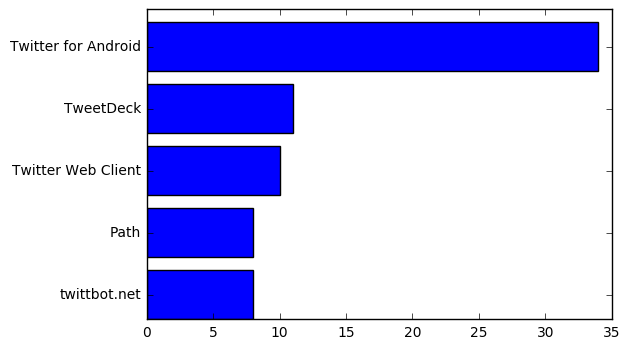

In [9]:
sources = data_set["source"].value_counts()[:5][::-1]

plt.barh(xrange(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()

In [ ]:
import csv

with open("tweet_export.csv", "wb") as csvfile:
    fieldnames = ["username", "tweet_id", "text", "created_at", "location"]
    writer = csv.DictWriter(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL, fieldnames=fieldnames)
    writer.writeheader()
    for tweet in results:
        data_set["username"] = tweet.user.screen_name
        data_set["tweet_id"] = tweet.id
        data["text"] = tweet.text.encode('utf-8')
        data["created_at"] = str(tweet.created_at)
        data["location"] = tweet.coordinates
        writer.writerow(data)